<a href="https://colab.research.google.com/github/catuer/Ketahanan_Pangan/blob/main/KP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_excel('/content/dataku.xlsx')
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887 entries, 0 to 2886
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tahun                           2887 non-null   int64  
 1   Wilayah                         2885 non-null   object 
 2   Kemiskinan (%)                  2885 non-null   float64
 3   Pengeluaran Pangan (%)          2885 non-null   float64
 4   Tanpa Listrik (%)               2885 non-null   float64
 5   Tanpa Air Bersih (%)            2885 non-null   float64
 6   Lama Sekolah Perempuan (tahun)  2885 non-null   float64
 7   Rasio Tenaga Kesehatan          2885 non-null   float64
 8   Angka Kesakitan                 2885 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 203.1+ KB
None
Tahun                             0
Wilayah                           2
Kemiskinan (%)                    2
Pengeluaran Pangan (%)            2
Tanpa List

In [8]:
numerik = df.select_dtypes(include=['float64', 'int64'])
df[numerik.columns] = numerik.fillna(numerik.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887 entries, 0 to 2886
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tahun                           2887 non-null   int64  
 1   Wilayah                         2885 non-null   object 
 2   Kemiskinan (%)                  2887 non-null   float64
 3   Pengeluaran Pangan (%)          2887 non-null   float64
 4   Tanpa Listrik (%)               2887 non-null   float64
 5   Tanpa Air Bersih (%)            2887 non-null   float64
 6   Lama Sekolah Perempuan (tahun)  2887 non-null   float64
 7   Rasio Tenaga Kesehatan          2887 non-null   float64
 8   Angka Kesakitan                 2887 non-null   float64
 9   skor                            2887 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 225.7+ KB


In [9]:
def hitung_skor(row):
    skor = 0
    if row['Kemiskinan (%)'] < 15: skor += 1
    if row['Pengeluaran Pangan (%)'] > 55: skor += 1
    if row['Tanpa Listrik (%)'] < 15: skor += 1
    if row['Tanpa Air Bersih (%)'] < 20: skor += 1
    if row['Rasio Tenaga Kesehatan'] > 0.5: skor += 1
    if row['Lama Sekolah Perempuan (tahun)'] > 7: skor += 1
    if row['Angka Kesakitan'] < 30: skor += 1
    return skor

df['skor'] = df.apply(hitung_skor, axis=1)


In [10]:
threshold_skor = df['skor'].quantile(0.60)

In [11]:
df['ketahanan_pangan'] = df['skor'].apply(lambda x: 1 if x > threshold_skor else 0)

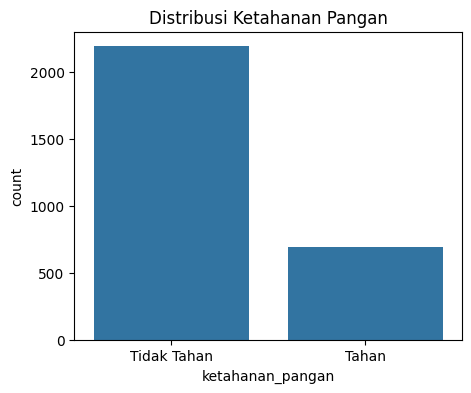

In [12]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='ketahanan_pangan')
plt.title("Distribusi Ketahanan Pangan")
plt.xticks([0, 1], ['Tidak Tahan', 'Tahan'])
plt.show()

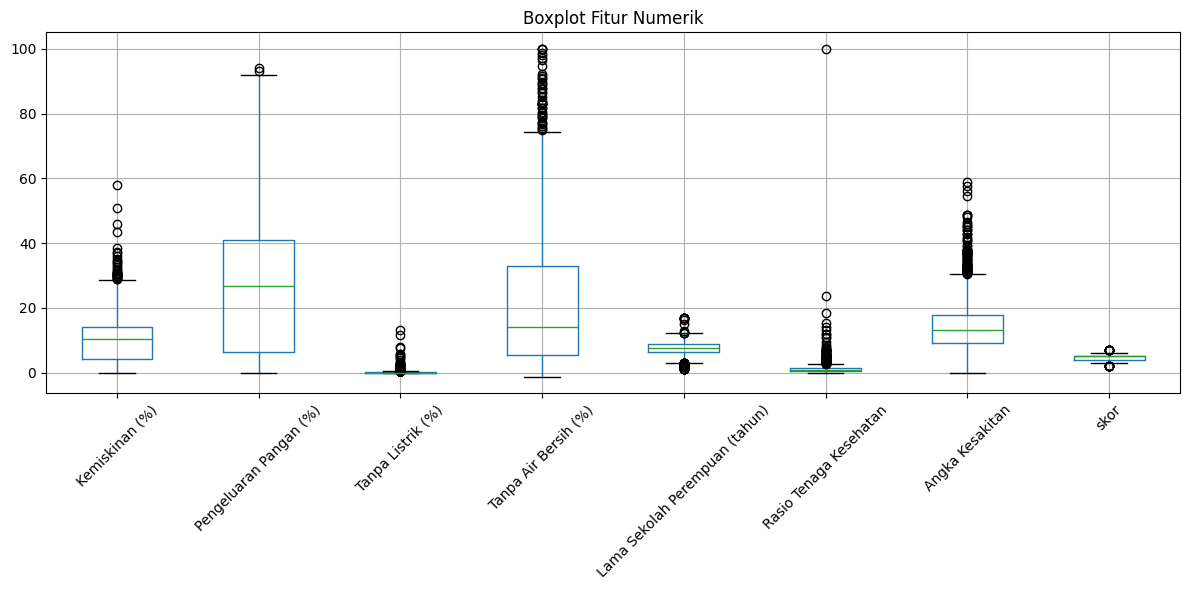

In [14]:
plt.figure(figsize=(12, 6))
df.drop(columns=['Tahun', 'Wilayah', 'ketahanan_pangan']).boxplot()
plt.title("Boxplot Fitur Numerik")
plt.xticks(rotation=45)
plt.tight_layout()

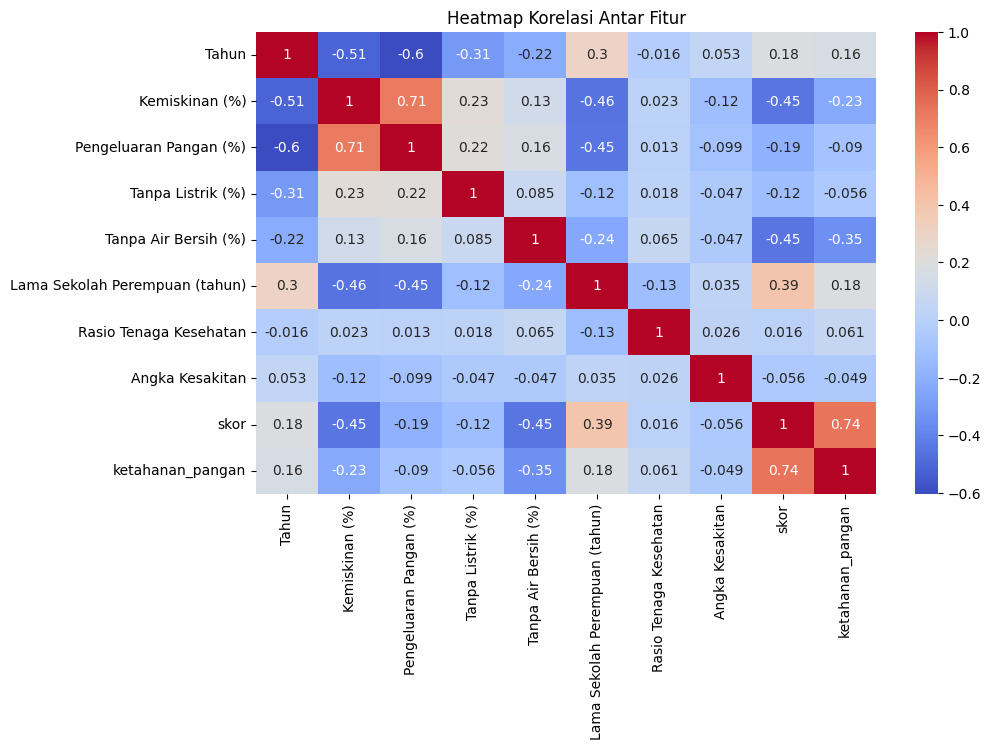

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [16]:
X = df.drop(columns=['Wilayah', 'Tahun', 'ketahanan_pangan'])
y = df['ketahanan_pangan']

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[661   0]
 [  0 206]]


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       661
           1       1.00      1.00      1.00       206

    accuracy                           1.00       867
   macro avg       1.00      1.00      1.00       867
weighted avg       1.00      1.00      1.00       867



In [23]:
hasil = df.loc[y_test.index, ['Wilayah']].copy()
hasil['Prediksi_Ketahanan_Pangan'] = y_pred
hasil['Status'] = hasil['Prediksi_Ketahanan_Pangan'].map({1: 'Tahan Pangan', 0: 'Tidak Tahan Pangan'})

In [24]:
print("\nHasil Prediksi per Wilayah:")
print(hasil)


Hasil Prediksi per Wilayah:
                         Wilayah  Prediksi_Ketahanan_Pangan  \
471           situbondo - besuki                          0   
1206     sidoarjo - tanggulangin                          1   
2381           lumajang - padang                          1   
2103           bangkalan - blega                          0   
2883  kota surabaya - sambikerep                          0   
...                          ...                        ...   
343         malang - poncokusumo                          0   
2649          ngawi - karangjati                          0   
2878   kota surabaya - mulyorejo                          0   
1883           sidoarjo - sedati                          1   
2728      lamongan - kembangbahu                          1   

                  Status  
471   Tidak Tahan Pangan  
1206        Tahan Pangan  
2381        Tahan Pangan  
2103  Tidak Tahan Pangan  
2883  Tidak Tahan Pangan  
...                  ...  
343   Tidak Tahan Pangan 